<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-January/blob/main/Shark%20Tank%20India/Shark_Tank_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np # linear algebra
import pandas as pd # for data preparation
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.renderers.default = 'notebook'

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
!pip install geopandas


In [13]:
df=pd.read_csv('https://raw.githubusercontent.com/Pepcoders/Data-Science-January/main/Shark%20Tank%20India/SharkTank-Final.csv')

In [14]:
df.head()

,Season,Episode,Company,Idea,Deal,Receive_Offer,Reject_Offer,Number of presenters,No of male presenters,No of female presenters,...,AshneerGrover_deal,AnupamMittal_deal,AmanGupta_deal,NamitaThapar_deal,VineetaSingh_deal,PeyushBansal_deal,GhazalAlagh_deal,Number of Sharks invested,Amount per Shark,Equity per Shark
0,1,1,BluePine Industries,Frozen Momos,1,1,0.0,3,2,1,...,1,0,1,0,1,0,0,3,25.0,5.333333
1,1,1,Booz scooters,Renting e-bike for mobility in private spaces,1,1,0.0,1,1,0,...,1,0,0,0,1,0,0,2,20.0,25.000000
2,1,1,Heart up my Sleeves,Detachable Sleeves,1,1,0.0,1,0,1,...,0,1,0,0,1,0,0,2,12.5,15.000000
3,1,2,Tagz Foods,Healthy Potato Chips,1,1,0.0,2,2,0,...,1,0,0,0,0,0,0,1,70.0,2.750000
4,1,2,Head and Heart,Brain Development Course,0,0,NaN,4,1,3,...,0,0,0,0,0,0,0,0,0.0,0.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season                     121 non-null    int64  
 1   Episode                    121 non-null    int64  
 2   Company                    121 non-null    object 
 3   Idea                       121 non-null    object 
 4   Deal                       121 non-null    int64  
 5   Receive_Offer              121 non-null    int64  
 6   Reject_Offer               87 non-null     float64
 7   Number of presenters       121 non-null    int64  
 8   No of male presenters      121 non-null    int64  
 9   No of female presenters    121 non-null    int64  
 10  Ask_Amount (INR Lakhs)     121 non-null    float64
 11  Ask_Equity                 121 non-null    float64
 12  Ask_Valuation (INR Lakhs)  121 non-null    float64
 13  Deal_Amount (INR Lakhs)    121 non-null    float64

In [16]:
df.isna().sum()

Season                        0
Episode                       0
Company                       0
Idea                          0
Deal                          0
Receive_Offer                 0
Reject_Offer                 34
Number of presenters          0
No of male presenters         0
No of female presenters       0
Ask_Amount (INR Lakhs)        0
Ask_Equity                    0
Ask_Valuation (INR Lakhs)     0
Deal_Amount (INR Lakhs)       0
Deal_Equity                   0
Deal_Valuation                0
AshneerGrover_present         0
AnupamMittal_present          0
AmanGupta_present             0
NamitaThapar_present          0
VineetaSingh_present          0
PeyushBansal_present          0
GhazalAlagh_present           0
AshneerGrover_deal            0
AnupamMittal_deal             0
AmanGupta_deal                0
NamitaThapar_deal             0
VineetaSingh_deal             0
PeyushBansal_deal             0
GhazalAlagh_deal              0
Number of Sharks invested     0
Amount p

In [18]:
df.describe()

,Season,Episode,Deal,Receive_Offer,Reject_Offer,Number of presenters,No of male presenters,No of female presenters,Ask_Amount (INR Lakhs),Ask_Equity,...,AshneerGrover_deal,AnupamMittal_deal,AmanGupta_deal,NamitaThapar_deal,VineetaSingh_deal,PeyushBansal_deal,GhazalAlagh_deal,Number of Sharks invested,Amount per Shark,Equity per Shark
count,121.0,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,...,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,1.0,19.305785,0.553719,0.719008,0.148760,2.066116,1.446281,0.619835,312.338851,5.083306,...,0.173554,0.198347,0.239669,0.198347,0.132231,0.231405,0.057851,1.231405,17.797523,5.448595
std,0.0,10.375326,0.499173,0.451352,0.357332,0.946357,1.079741,0.698286,2721.640471,3.882554,...,0.380300,0.400413,0.428657,0.400413,0.340151,0.423484,0.234433,1.406890,23.338184,10.651783
min,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.001010,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,11.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,45.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,19.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,50.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,1.250000
75%,1.0,28.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,80.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,25.000000,6.000000
max,1.0,36.000000,1.000000,1.000000,1.000000,6.000000,6.000000,3.000000,30000.000000,25.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,100.000000,75.000000


In [19]:
df['Deal '].value_counts()

1    67
0    54
Name: Deal , dtype: int64

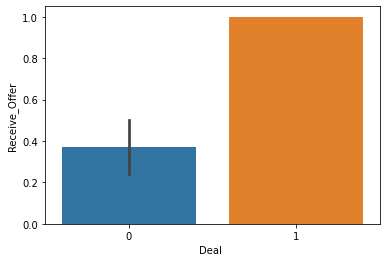

In [20]:
sns.barplot(df['Deal '],df['Receive_Offer'])

In [21]:
df['AshneerGrover_present'].value_counts()

1    98
0    23
Name: AshneerGrover_present, dtype: int64

In [22]:
df['AnupamMittal_present'].value_counts()

1    121
Name: AnupamMittal_present, dtype: int64

In [23]:
df['AmanGupta_present'].value_counts()

1    102
0     19
Name: AmanGupta_present, dtype: int64

In [24]:
Ashneer_present=len(df[df.AshneerGrover_present==1])
Anupam_present=len(df[df.AnupamMittal_present==1])
Aman_present=len(df[df.AmanGupta_present==1])
Namita_present=len(df[df.NamitaThapar_present==1])
Vinneta_present=len(df[df.VineetaSingh_present==1])
Peyush_present=len(df[df.PeyushBansal_present==1])
Ghazal_present=len(df[df.GhazalAlagh_present==1])

In [25]:
Ashneer_present

98

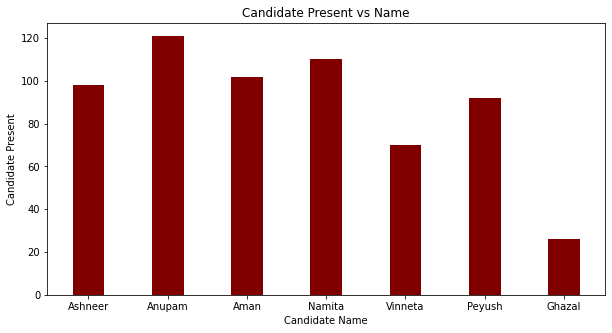

In [26]:
fig=plt.figure(figsize=(10,5))
present=[Ashneer_present,Anupam_present,Aman_present,Namita_present,Vinneta_present,Peyush_present,Ghazal_present]
name=['Ashneer','Anupam','Aman','Namita','Vinneta','Peyush','Ghazal']
plt.bar(name,present,color='maroon',width=0.4)
plt.xlabel("Candidate Name")
plt.ylabel("Candidate Present")
plt.title("Candidate Present vs Name")
plt.show()

Text(0.55, 1.15, '% of Candidates present ')

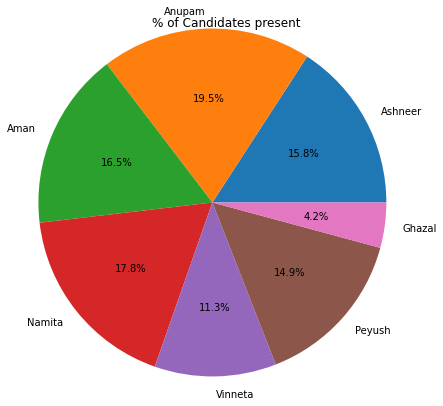

In [27]:
plt.pie(present,labels=name,radius=2,autopct='%0.1f%%')
plt.suptitle('% of Candidates present ',x=0.55,y=1.15)

In [28]:
aman_deal = len(df[df.AmanGupta_deal == 1])
anupam_deal = len(df[df.AnupamMittal_deal == 1])
ashneer_deal = len(df[df.AshneerGrover_deal == 1])
ghazal_deal = len(df[df.GhazalAlagh_deal == 1])
namita_deal = len(df[df.NamitaThapar_deal == 1])
peyush_deal = len(df[df.PeyushBansal_deal == 1])
vineeta_deal = len(df[df.VineetaSingh_deal == 1])

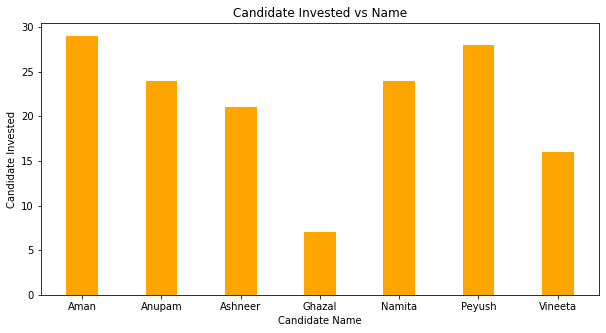

In [29]:
fig = plt.figure(figsize = (10, 5))
deal = [aman_deal, anupam_deal, ashneer_deal, ghazal_deal,
namita_deal, peyush_deal, vineeta_deal]
names = ['Aman','Anupam', 'Ashneer', 'Ghazal', 'Namita', 'Peyush', 'Vineeta']
plt.bar(names, deal, color ='orange',width = 0.4)
plt.xlabel("Candidate Name")
plt.ylabel("Candidate Invested")
plt.title("Candidate Invested vs Name")
plt.show()

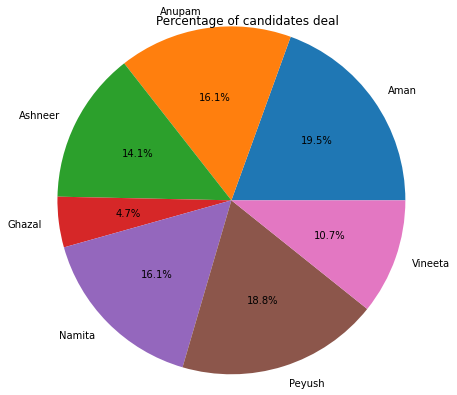

In [30]:
plt.pie(deal,labels=names,radius=2,autopct='%0.1f%%')
plt.suptitle('Percentage of candidates deal',x=0.55,y=1.15)
plt.show()

In [31]:
#percentage of inventments
aman_percent = (aman_deal/Aman_present)*100
anupam_percent = (anupam_deal/Anupam_present)*100
ashneer_percent = (ashneer_deal/Ashneer_present)*100
ghazal_percent = (ghazal_deal/Ghazal_present)*100
namita_percent = (namita_deal/Namita_present)*100
peyush_percent = (peyush_deal/Peyush_present)*100
vineeta_percent = (vineeta_deal/Vinneta_present)*100

Text(0.5, 1.0, 'Candidate Deal-percentage vs name')

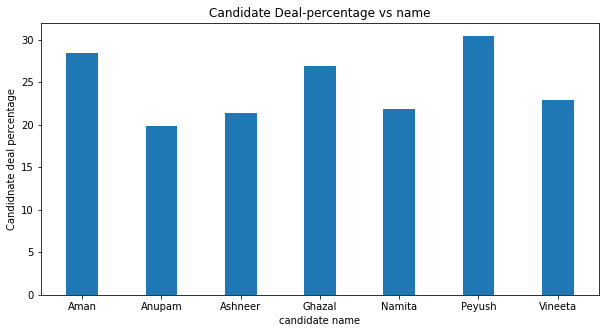

In [32]:
fig = plt.figure(figsize = (10, 5))
percentage=[aman_percent,anupam_percent,ashneer_percent,ghazal_percent,namita_percent,peyush_percent,vineeta_percent]
plt.bar(names,percentage,width=0.4)
plt.xlabel('candidate name')
plt.ylabel('Candidnate deal percentage')
plt.title('Candidate Deal-percentage vs name')

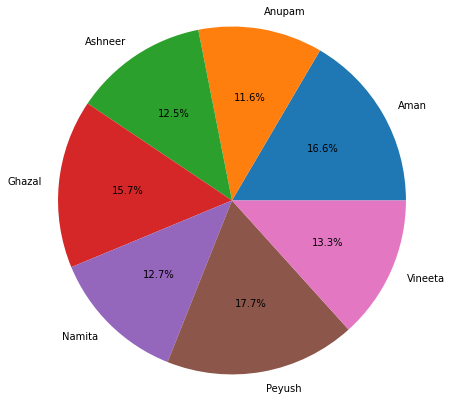

In [33]:
plt.pie(percentage,labels=names,radius=2,autopct='%0.1f%%')
plt.show()